### Echo chambers visualization

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import matplotlib.colors as mcolors

#### Data

- uid_rt: the source of the information, user who is retweeted
- msi_uid: average msi of users who retweeted 
- msi_uid_rt: msi of the user who is retweeted

In [4]:
# Average precomputed
df = pd.read_csv('Results/Average_score_targets_users.csv')
df.head(n = 5)

,uid_rt,msi_uid,msi_uid_rt
0,-9222975002879431468,0.725754,0.877877
1,-9222742428357238434,-1.343281,-0.721132
2,-9222034415581665965,0.622454,0.860195
3,-9221778604916172400,-1.331298,0.369309
4,-9221473322455605813,0.547041,0.055484


<Figure size 9600x9600 with 0 Axes>

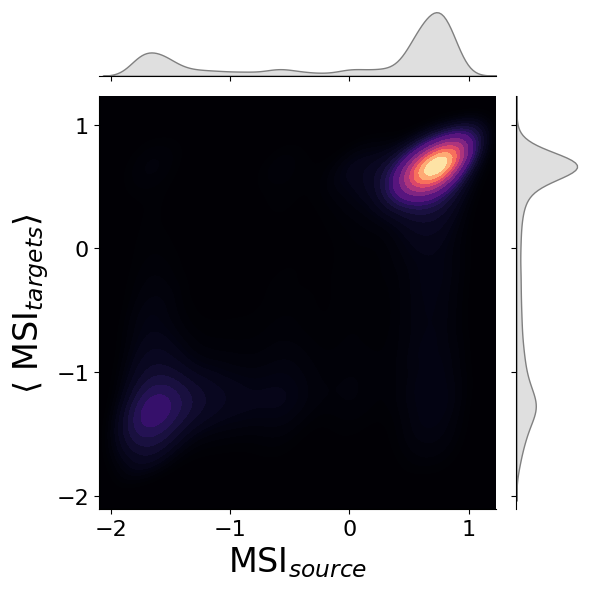

In [5]:
plt.figure(dpi = 600, figsize=(16,16))

ax1 = sns.jointplot(x = df['msi_uid_rt'], y = df['msi_uid'], thresh=0, levels = 20, 
                    cmap="magma", kind = 'kde', palette = 'magma', fill = True, bw_method = 0.15, cbar = False,
                    marginal_kws = dict(color = 'grey'))

plt.sca(ax1.ax_joint)
plt.xlim(np.quantile(df['msi_uid_rt'].to_list(), q = [0.005, 0.995]) + [-0.35, 0.35])
plt.ylim(np.quantile(df['msi_uid_rt'].to_list(), q = [0.005, 0.995]) + [-0.35, 0.35])
plt.xlabel(r'MSI$_{source}$', size = 24)
plt.ylabel(r'$\langle$ MSI$_{targets} \rangle$', size = 24)

           
plt.xticks([-2, -1, 0, 1], size = 16)
plt.yticks([-2, -1, 0, 1], size = 16)
plt.tight_layout()
plt.savefig('Results/EchoChamber_average_targets.png')
plt.savefig('Results/EchoChamber_average_targets.pdf')
plt.show()